# Basic Geopandas Examples
https://geopandas.org/en/stable/index.html

Frank Donnelly
Head of GIS & Data Services, Brown University Library

Dec 11, 2024

In [1]:
import os, pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt
%matplotlib inline

# Read Input and Create Geometry From Points
Must know and plot the CRS of points as is; CRS is referenced using EPSG codes: https://epsg.io/. 4269 is NAD 83, often used by US federal govt. The most common long / lat CRS is 4326, WGS 84.

In [2]:
# Read shapefile
county_file=os.path.join('input','ri_county_bndy.shp')
gdf_cnty=gpd.read_file(county_file)
gdf_cnty.head()

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,funcstat,aland,awater,intptlat,intptlon,geometry
0,44,009,01219782,44009,Washington,Washington County,06,H4,G4020,148,39300,N,852827571,604769755,+41.3967920,-071.6202820,"MULTIPOLYGON (((307427.031 86583.659, 307412.2..."
1,44,007,01219781,44007,Providence,Providence County,06,H4,G4020,148,39300,N,1060552463,67870199,+41.8697678,-071.5786246,"POLYGON ((315157.916 236069.733, 315138.271 23..."
2,44,001,01219777,44001,Bristol,Bristol County,06,H4,G4020,148,39300,N,62500772,53359134,+41.7068397,-071.2866874,"POLYGON ((407177.244 220459.551, 407060.698 22..."
3,44,005,01219779,44005,Newport,Newport County,06,H4,G4020,148,39300,N,265293780,547001789,+41.5010449,-071.2830626,"POLYGON ((433188.859 146428.981, 433458.478 14..."
4,44,003,01219778,44003,Kent,Kent County,06,H4,G4020,148,39300,N,436588773,50686111,+41.6751180,-071.5802819,"POLYGON ((315828.392 188986.602, 315772.035 18..."


In [3]:
# Read CSV
point_file=os.path.join('input','test_points.csv')
df_pnts=pd.read_csv(point_file, index_col='OBS_NUM', delimiter=',',dtype={'GEOID':str})

gdf_pnts = gpd.GeoDataFrame(df_pnts,geometry=gpd.points_from_xy(
    df_pnts['INTPTLONG'],df_pnts['INTPTLAT']),crs = 'EPSG:4269')
gdf_pnts

,OBS_NAME,GROUP,OBS_DATE,GEOID,NAME,USPS,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,geometry
OBS_NUM,,,,,,,,,,,
0,alfa,a,1/5/2020,4414140,Central Falls city,RI,1.194,0.080,41.890064,-71.393481,POINT (-71.39348 41.89006)
1,bravo,a,1/31/2020,4419180,Cranston city,RI,28.345,1.672,41.769734,-71.485049,POINT (-71.48505 41.76973)
2,charlie,a,1/15/2020,4422960,East Providence city,RI,13.284,3.322,41.800433,-71.359258,POINT (-71.35926 41.80043)
3,delta,a,2/10/2020,4449960,Newport city,RI,7.656,3.718,41.476681,-71.319627,POINT (-71.31963 41.47668)
4,echo,a,2/5/2020,4454640,Pawtucket city,RI,8.667,0.297,41.874824,-71.373323,POINT (-71.37332 41.87482)
5,foxtrot,a,1/15/2020,4459000,Providence city,RI,18.406,2.179,41.823056,-71.418784,POINT (-71.41878 41.82306)
6,golf,b,1/16/2020,4459000,Providence city,RI,18.406,2.179,41.823056,-71.418784,POINT (-71.41878 41.82306)
7,hotel,b,1/31/2020,4474300,Warwick city,RI,35.001,14.750,41.703085,-71.420310,POINT (-71.42031 41.70309)
8,india,b,2/1/2020,4480780,Woonsocket city,RI,7.746,0.194,42.001708,-71.499947,POINT (-71.49995 42.00171)


# Get CRS Info and Transform

In [4]:
# CRS Counties
gdf_cnty.crs

<Projected CRS: EPSG:3438>
Name: NAD83 / Rhode Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Rhode Island - counties of Bristol; Kent; Newport; Providence; Washington.
- bounds: (-71.85, 41.13, -71.08, 42.02)
Coordinate Operation:
- name: SPCS83 Rhode Island zone (US survey foot)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
# Bounds Counties
gdf_cnty.total_bounds

array([216185.97680585,   4568.47853844, 440907.38505165, 340888.89765888])

In [6]:
# CRS Points
gdf_pnts.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [7]:
# Bounds Points
gdf_pnts.total_bounds

array([-72.096176,  41.332957, -71.319627,  42.001708])

In [8]:
# Transform Point Geometry to Match County CRS
# 3438 is the EPSG for for the RI State Plane Zone
gdf_pnts.to_crs(3438,inplace=True)
gdf_pnts.crs

<Projected CRS: EPSG:3438>
Name: NAD83 / Rhode Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Rhode Island - counties of Bristol; Kent; Newport; Providence; Washington.
- bounds: (-71.85, 41.13, -71.08, 42.02)
Coordinate Operation:
- name: SPCS83 Rhode Island zone (US survey foot)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
gdf_pnts.total_bounds

array([164350.33557909,  91515.54713867, 377511.59607262, 334638.78150084])

# Generate Lines from Points Grouped by Categories and Calculate Length
Assumes points are in proper sequence; if not, sort by sequence column first. Output measurement units are based on the CRS.

In [10]:
lines = gdf_pnts.groupby('GROUP')['geometry'].apply(lambda x: LineString(x.tolist()))
gdf_lines = gpd.GeoDataFrame(lines, geometry='geometry',crs = 'EPSG:3438').reset_index()
gdf_lines['length_mi']=(gdf_lines.length)/5280
gdf_lines.loc[:,['GROUP','length_mi']]

,GROUP,length_mi
0,a,70.718183
1,b,29.295344
2,c,55.516051


# Spatial Join Points and Polygons
Keep all points on left, null values for non-matching counties on right. Take subset of columns from right, must always include geom for spatial joins.

In [11]:
gdf_pnts_wcnty=gpd.sjoin(gdf_pnts, gdf_cnty[['geoid','namelsad','geometry']],
                         how='left', predicate='intersects')
gdf_pnts_wcnty.rename(columns={'geoid': 'COUNTY_ID', 'namelsad': 'COUNTY'}, inplace=True)
gdf_pnts_wcnty.loc[:,['OBS_NAME','OBS_DATE','COUNTY']]

,OBS_NAME,OBS_DATE,COUNTY
OBS_NUM,,,
0,alfa,1/5/2020,Providence County
1,bravo,1/31/2020,Providence County
2,charlie,1/15/2020,Providence County
3,delta,2/10/2020,Newport County
4,echo,2/5/2020,Providence County
5,foxtrot,1/15/2020,Providence County
6,golf,1/16/2020,Providence County
7,hotel,1/31/2020,Kent County
8,india,2/1/2020,Providence County


# Plot

<AxesSubplot: >

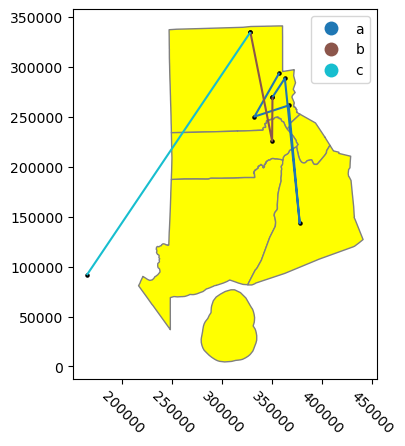

In [12]:
fig, ax = plt.subplots()
plt.xticks(rotation=315)
gdf_cnty.plot(ax=ax, color='yellow', edgecolor='grey')
gdf_pnts.plot(ax=ax,color='black', markersize=5)
gdf_lines.plot(ax=ax, column="GROUP", legend=True)

# WRITE OUTPUT
Shapefile format cannot handle column names > 10 characters

In [13]:
out_points=os.path.join('output','test_points_counties.shp')
out_lines=os.path.join('output','test_lines.shp')

gdf_pnts_wcnty.to_file(out_points)
gdf_lines.to_file(out_lines)

/tmp/ipykernel_25967/1840073267.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_pnts_wcnty.to_file(out_points)
